In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

csv_files =  glob.glob('/content/drive/MyDrive/data/*.csv')
chunk_number = 3
for file_name in csv_files:
    print("hi")


hi
hi
hi


In [ ]:
chunks = []
labels = []
for file_name in csv_files:
    #print("hi")
    blank_line_marker_1 = 0
    blank_line_marker_2 = 0


    line_num = 0
    blank_line_freq = 0
    data = pd.read_csv(file_name,header=1, skip_blank_lines=False)
    with open(file_name, 'r') as file:
        for line in file:

            row = pd.Series(line.strip().split(','))
            if row.equals(pd.Series([""])):

                blank_line_freq = blank_line_freq +1
                blank_line_marker_1 = blank_line_marker_2
                blank_line_marker_2 = line_num

                if blank_line_marker_1 != blank_line_marker_2:


                    chunk = data.iloc[blank_line_marker_1:blank_line_marker_2-2].reset_index(drop=True)
                    chunks.append(chunk)
                    labels.append(file_name[35].capitalize())


            line_num = line_num +1




        number_of_chunks = blank_line_freq - 1

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



In [ ]:
print(chunks[0])
print(labels[10])

                     gyro-x                 gyro-y                 gyro-z  \
0       0.08598201721906662    0.11492472141981125    0.09891433268785477   
1      -0.03585360571742058     0.0826200470328331    0.08907102048397064   
2      -0.12421302497386932    0.12353072315454483    0.12011761963367462   
3       -0.1566745638847351    0.18096604943275452    0.16810192167758942   
4      -0.16065146028995514    0.21922023594379425    0.21808306872844696   
..                      ...                    ...                    ...   
251     0.43932968378067017    0.21264728903770447    0.15110109746456146   
252     0.48554301261901855     0.2797591984272003    0.16540999710559845   
253      0.5421061515808105     0.3562478721141815    0.15261776745319366   
254        0.65826016664505    0.39737239480018616    0.12028886377811432   
255      0.7493720054626465    0.34238743782043457    0.07960081845521927   

                   accel-x                accel-y                accel-z  


In [ ]:

features = []
for chunk in chunks:

    scaler=StandardScaler()
    scaler.fit(chunk)
    scaled_data=scaler.transform(chunk)
    pca=PCA(n_components=2)
    pca.fit(scaled_data)
    x_pca=pca.transform(scaled_data)





    features.append(x_pca)

print(features[0].shape)
print(type(features))
print(len(features))

#array = features[0].to_numpy()


max_rows = max(df.shape[0] for df in features)
max_cols = max(df.shape[1] for df in features)

print(max_rows, max_cols)
resized_array_list = []
for array in features:
    resized_array = np.zeros((max_rows, max_cols))  # Create a new array of zeros with the target size
    resized_array[:array.shape[0], :array.shape[1]] = array  # Copy the original array into the new array
    resized_array_list.append(resized_array)


features = np.array(resized_array_list)

np.shape(features)


(256, 2)
<class 'list'>
60
426 2


(60, 426, 2)

Text(0.5, 1.0, 'B')

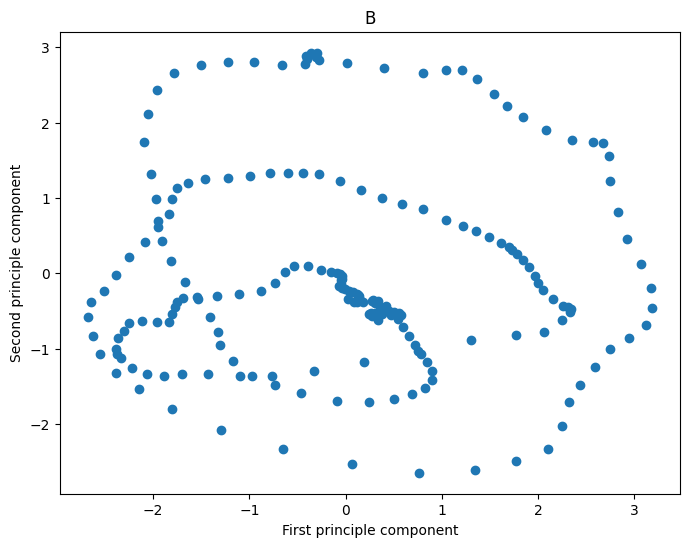

In [ ]:
data_num = 37
plt.figure(figsize=(8,6))
plt.scatter(features[data_num][:,0],features[data_num][:,1])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')
plt.title(labels[data_num])


<class 'numpy.ndarray'>


AttributeError: ignored

In [ ]:
import numpy as np
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Generate random labels (3 classes)
num_labels = 3
input_shape = (426, 2)

# Split the data into training and testing sets
label_encoder = LabelEncoder()
numeric_labels = label_encoder.fit_transform(labels)

# Apply one-hot encoding
onehot_encoder = OneHotEncoder(sparse=False)
onehot_labels = onehot_encoder.fit_transform(numeric_labels.reshape(-1, 1))
train_data, test_data, train_labels, test_labels = train_test_split(features, onehot_labels, test_size=0.2, random_state=42)

# Define the neural network model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=input_shape),  # Flattens the 2D input into a 1D array
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_labels, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_data, train_labels, epochs=10, batch_size=32)

# Evaluate the model on the testing set
loss, accuracy = model.evaluate(test_data, test_labels)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10
2/2 [==============================] - 2s 8ms/step - loss: 1.2453 - accuracy: 0.3542
Epoch 2/10
2/2 [==============================] - 0s 8ms/step - loss: 0.5612 - accuracy: 0.8750
Epoch 3/10
2/2 [==============================] - 0s 7ms/step - loss: 0.3434 - accuracy: 0.9167
Epoch 4/10
2/2 [==============================] - 0s 7ms/step - loss: 0.2339 - accuracy: 0.9375
Epoch 5/10
2/2 [==============================] - 0s 7ms/step - loss: 0.1703 - accuracy: 0.9583
Epoch 6/10
2/2 [==============================] - 0s 7ms/step - loss: 0.1240 - accuracy: 0.9792
Epoch 7/10
2/2 [==============================] - 0s 9ms/step - loss: 0.0837 - accuracy: 1.0000
Epoch 8/10
2/2 [==============================] - 0s 7ms/step - loss: 0.0613 - accuracy: 1.0000
Epoch 9/10
2/2 [==============================] - 0s 8ms/step - loss: 0.0447 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 153ms/step - loss: 0.4717 - accuracy: 0.8333
Test Loss: 0.47174426913261414
Test A